In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

In [2]:
import datetime

In [3]:
print("Started at : ", datetime.datetime.now())

Started at :  2023-11-05 23:13:51.271983


In [4]:
import requests
from zipfile import ZipFile

In [5]:
# d = requests.get("https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip")

In [6]:
# with open("data/getting_started.zip", "wb") as f:
#     f.write(d.content)

In [7]:
# with ZipFile("data/getting_started.zip", 'r') as z:
#     z.extractall("data/")

In [8]:
import pandas as pd

In [9]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [10]:
import numpy as np
import random
random.seed(42)
np.random.seed(42)

In [11]:
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

In [12]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [13]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [14]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [15]:
train_df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [16]:
for _ in range(10):
    random_no = random.randint(0, len(train_df)-1)
    print("\033[0mLabel : ",f"\033[1m{train_df_shuffled.target[random_no]}")
    print(f"\033[0mText : " , f"\033[1m{train_df_shuffled.text[random_no]}")
    print("")

Label :  0
Text :  Why did God order obliteration of ancient Canaanites? http://t.co/pKKcdWjyg0 via @worldnetdaily

Label :  0
Text :  Friday supposed to be a happy day but it's a bloody friday hah zzzz

Label :  1
Text :  Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/X2Qsjod40u #worldnews

Label :  0
Text :  Sinkhole Selfies: You Wont Believe What's In The Brooklyn Sinkhole!: 
        Sinkhole Sel... http://t.co/OYY9MGW7HN @hinterestin #funny

Label :  0
Text :  Why are you deluged with low self-image? Take the quiz: http://t.co/1PFlM532mG http://t.co/58qruGZvg0

Label :  0
Text :  #NP Metallica - Damage Inc

Label :  1
Text :  1 ÛÒ The bug that almost crashed the Euro - http://t.co/KgkZ50Q8TK

Label :  1
Text :  70th anniversary of Hiroshima atomic bombing marked  http://t.co/1mGvd4x5Oe

Label :  1
Text :  Oil and Gas Exploration Takes Seismic Shift in Gabon to Somalia - Bloomberg http://t.co/bEKrPjnYHs #??????? #Somalia

Label :  0
Text :  I love the 

 - `Diaster - 1`

 - `Not Real Diaster - 0`

## Data Spliting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_data , val_data , train_label , val_label = train_test_split \
                                                    (
                                                    train_df_shuffled['text'].to_numpy(),
                                                    train_df_shuffled['target'].to_numpy(),
                                                    test_size=0.1,
                                                    random_state=42
                                                    )

In [19]:
print(len(train_data), len(val_data), len(train_label), len(val_label))

6851 762 6851 762


In [20]:
train_data[:10], train_label[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [22]:
text_vectorizer = TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    vocabulary=None)

In [23]:
text_vectorizer.get_vocabulary()

['', '[UNK]']

In [24]:
' '.join([str(len(_.split(" "))) for _ in train_data])[:100]

'7 6 20 12 7 17 5 13 25 15 19 11 20 22 9 24 19 6 4 12 8 6 17 17 7 18 19 26 21 10 27 14 5 7 11 7 15 6 '

In [25]:
int(np.ceil(sum(len(_.split(' ')) for _ in train_data ) / len(train_data)))

15

In [26]:
max_tokens = 15000
max_length = int(np.ceil(sum(len(_.split(' ')) for _ in train_data ) / len(train_data)))

In [27]:
text_vectorizer = TextVectorization(max_tokens=max_tokens,
                                    output_mode='int',
                                   output_sequence_length=max_length)

In [28]:
text_vectorizer.get_vocabulary()

['', '[UNK]']

In [29]:
text_vectorizer.adapt(train_data)

In [30]:
sample_data = "Earthquake & flood just hit in Indonesia"
text_vectorizer([sample_data])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 290,  232,   29,  244,    4, 3744,    0,    0,    0,    0,    0,
           0,    0,    0,    0]], dtype=int64)>

In [31]:
# Let's Visualize the data 
def show_rand_data(train_data, text_vectorizer):
    _ = np.random.choice(train_data)
    print(f"Text :  {_}\n")
    print((text_vectorizer([_])))
    

In [32]:
show_rand_data(train_data, text_vectorizer)

Text :  FUCK NUCLEAR WEAPON

tf.Tensor([[349 105 263   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 15), dtype=int64)


In [33]:
wordlist = [_ for _ in text_vectorizer.get_vocabulary()]

In [34]:
wordlist[:10], wordlist[-10:]

(['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'],
 ['httptcoe9d9lk5fdw',
  'httptcoe981dgskab',
  'httptcoe90j3vjolc',
  'httptcoe84ifmcczn',
  'httptcoe7ojhpdfg2',
  'httptcoe7fn5g5ruu',
  'httptcoe65v80fcus',
  'httptcoe61x9y65qd',
  'httptcoe5cns6ufpa',
  'httptcoe4ydbm4dx6'])

In [35]:
len(wordlist)

15000

## Embedding Layer

In [36]:
## Embedding is just a matrix which values can be updated during learning.
# In case of Vectorization, the values are static, we can't update the values while learning

` Embedding Layer ` => True positive int(index) into dense vector

  -  `input_dim` : `len(text_vectorizer.get_vocabulary())`
  -  `output_dim` : length of output dimension.
  -  `embedding_initializer` : `uniform` - randomly initializes the vector with uniform values
  -   `input_length` : avg of sum of len of all sentences
  

In [37]:
from tensorflow.keras import layers
tf.random.set_seed(42)

In [38]:
embedding = layers.Embedding(input_dim=len(text_vectorizer.get_vocabulary()),
                            output_dim= 512,
                            embeddings_initializer='uniform',
                            input_length=(max_length))

In [39]:
embedding.build(input_shape=len(text_vectorizer.get_vocabulary()))

In [40]:
embedding.embeddings[0][:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 0.02777939,  0.02385018, -0.00165467,  0.03224889,  0.03659432,
        0.02667179,  0.03552976, -0.02964037,  0.03442205, -0.02515832,
       -0.04503341, -0.04819641,  0.02669868, -0.01960029,  0.01672551,
        0.00703441, -0.04624754, -0.03160368,  0.02162139, -0.04893842],
      dtype=float32)>

In [41]:
from abc import ABC

In [42]:
class RandomData(ABC):
    def show_rand_data(self,text_vectorizer=None, embedding=None):
        self.text_vectorizer=text_vectorizer
        self.embedding= embedding

In [43]:
class ShowRandomData(RandomData):
    def show_random_data(self, text_vectorizer, embedding,data):
        super().show_rand_data(text_vectorizer, embedding)
        self.train_data = data
        no = random.randint(0, len(self.train_data) - 1)
        for _ in range(1):
            print(self.train_data[no])
            print(self.embedding(self.text_vectorizer([self.train_data[no]])))
            print("")
    

In [44]:
s = ShowRandomData()

In [45]:
s.show_random_data(text_vectorizer=text_vectorizer, embedding=embedding, data=train_data)

Oh my heart racing And my temperature is blazing through the roof #VideoVeranoMTV Fifth Harmony
tf.Tensor(
[[[ 0.02549665 -0.0457195  -0.03540735 ...  0.00638877 -0.01105022
    0.03491643]
  [ 0.02885299  0.00518136  0.03004831 ... -0.01086997  0.00753457
   -0.01003518]
  [ 0.02531621 -0.04137992 -0.03808884 ... -0.03018323 -0.01139037
   -0.01405187]
  ...
  [-0.02078965  0.007322    0.01242671 ... -0.01154436 -0.04556436
    0.02871147]
  [-0.02016583  0.01078612  0.01618109 ... -0.0485405  -0.0353484
    0.04574767]
  [-0.02811948 -0.04412038  0.02149377 ...  0.02768054 -0.04858385
   -0.02722802]]], shape=(1, 15, 512), dtype=float32)



In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## Naive Bayes Model

In [47]:
model0 = Pipeline([
                    ("tfid", TfidfVectorizer()),
                    ("clf", MultinomialNB() )  
                 ])

In [48]:
print(model0)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])


In [49]:
model0.fit(train_data, train_label)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('clf', MultinomialNB())])

In [50]:
model0_score = model0.score(val_data, val_label)

In [51]:
print("Model Accuracy : {0} %" .format((model0_score * 100)))

Model Accuracy : 79.26509186351706 %


### Model Evaluation

In [52]:
from sklearn.metrics import accuracy_score, precision_score, precision_recall_fscore_support
def eval_the_model(y_true, y_pred):
    '''
    Args:
    _________________________________________
        y_true : true validation values
        y_pred : model predicted label values
    _________________________________________
    '''
    acc_score = accuracy_score(y_pred, y_true)
    acc_percentage = acc_score * 100 
    precision, recall, f1_score, support = precision_recall_fscore_support(y_pred, y_true, average="weighted")
    output = {
        "Accuracy Score" : acc_score,
        "Accuracy Percentage " : acc_score * 100,
        "Precision (TP / (TP + FP))" : precision,
        "Recall (TP / (TP + FN))" : recall,
        "F1-Score" : f1_score,
        "Support" : support
    }
    return output
    

In [53]:
y_preds = model0.predict(val_data)

In [54]:
eval_the_model(y_preds, val_label)

{'Accuracy Score': 0.7926509186351706,
 'Accuracy Percentage ': 79.26509186351706,
 'Precision (TP / (TP + FP))': 0.8111390004213173,
 'Recall (TP / (TP + FN))': 0.7926509186351706,
 'F1-Score': 0.7862189758049549,
 'Support': None}

## Simple Dense Model

In [55]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D

In [56]:
inputs = Input(shape=(1,), dtype='string')
X = text_vectorizer(inputs)
X = embedding(X)
X = GlobalAveragePooling1D()(X)
outputs = Dense(1, activation='sigmoid')(X)
model1 = tf.keras.Model(inputs, outputs, name="simple_dense_model")

In [57]:
model1.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [58]:
model1.summary()

Model: "simple_dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 512)           7680000   
                                                                 
 global_average_pooling1d (G  (None, 512)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 7,680,513
Trainable params: 7,680,

In [68]:
# Model Fitting
history1 = model1.fit(train_data,
                      train_label,
                      epochs=5,
                      validation_data=(val_data, val_label))

Epoch 1/5
215/215 [==============================] - 28s 129ms/step - loss: 0.0403 - accuracy: 0.9867 - val_loss: 0.8606 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 27s 124ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.9079 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 27s 127ms/step - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.9540 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 26s 123ms/step - loss: 0.0319 - accuracy: 0.9888 - val_loss: 0.9908 - val_accuracy: 0.7480
Epoch 5/5
215/215 [==============================] - 27s 127ms/step - loss: 0.0296 - accuracy: 0.9893 - val_loss: 1.0134 - val_accuracy: 0.7546


In [69]:
import matplotlib.pyplot as plt
def plot_the_model(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(val_loss))
    plt.plot(epochs, accuracy, label='training accuracy')
    plt.plot(epochs, val_accuracy, label='validation_accuracy')
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.ylabel("Loss")
    plt.xlabel('Epochs')
    plt.legend()

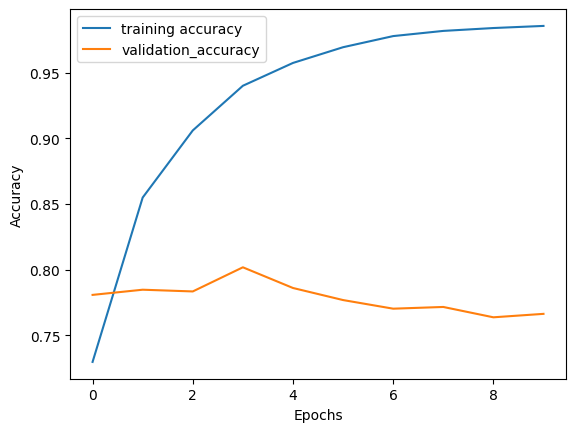

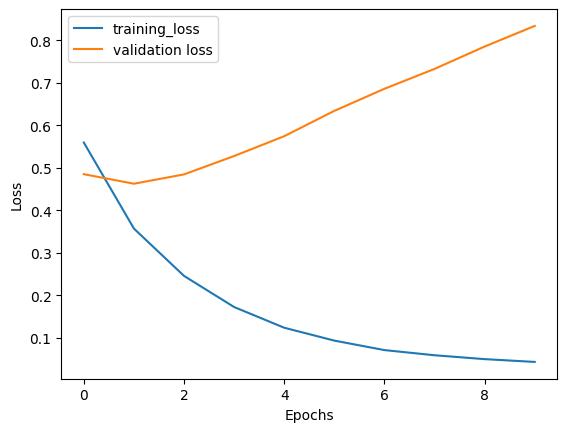

In [65]:
plot_the_model(history1)

In [70]:
model1.evaluate(val_data, val_label) # Returns validation_loss, validation_accuracy

24/24 [==============================] - 0s 6ms/step - loss: 1.0134 - accuracy: 0.7546


[1.0133509635925293, 0.7545931935310364]